# 1.1 PyTorch for Computer Vision

In this note, we will address some of the basics commands that you will need from PyTorch in general and in computer vision in particular.

- [Basic PyTorch commands](#Basic-PyTorch-commands)
- [Computer vision data sets](#Computer-vision-data-sets)
- [Transforms](#Transforms)
- [Exercises](#Exercises)

First, we import the required libraries. These should all be available on Google Colab.

In [1]:
import torch # PyTorch
import torchvision # Computer vision
# Data sets and transforms
from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# Other libraries
import matplotlib.pyplot as plt
import numpy as np

You can, e.g., check your PyTorch 

In [2]:
torch.__version__

'1.10.1+cu102'

## Basic PyTorch commands

PyTorch has its own objects: PyTorch tensors. All data will have to be put in this format.

In [3]:
scalar = torch.tensor(1)
vector = torch.tensor([1, 2])

If you already have a tensor object, you can print different properties

In [4]:
print(vector.ndim, vector.shape,vector.dtype)

1 torch.Size([2]) torch.int64


Many of the commands, such as the one creating vectors with ones in each entry, mirror the corresponding commands in numpy.

In [5]:
t0 = torch.zeros(size=(3,1))
print(t0)
t1 = torch.ones(size=(3,1))
print(t1)

tensor([[0.],
        [0.],
        [0.]])
tensor([[1.],
        [1.],
        [1.]])


Just like in numpy you can, for instance, easily perform element-wise multiplication, multiply a tensor with a scalar or determine the index of the entry with the maximum or minimum value.

In [6]:
print(10*vector)
print(vector*vector)
print(vector.argmax())
print(vector.argmin())

tensor([10, 20])
tensor([1, 4])
tensor(1)
tensor(0)


When creating socalled batches of data in later notebooks later, we will sometimes need to be able to add a dimensions to a tensor. We thus keep the content of the data but add an empty dimension along the dimension dim.

In [7]:
torch.unsqueeze(vector,dim=0)

tensor([[1, 2]])

You can also turn PyTorch tensors into numpy objects

In [8]:
vector.numpy()

array([1, 2])

Or numpy objects into tensors

In [9]:
array = np.arange(1,3)
torch.from_numpy(array)

tensor([1, 2])

For more basic PyTorch commands, see the exercises below.

## Computer vision data sets

In this course, we will dive into Deep Learning for computer vision, i.e., we will be working with image data. Torchvision provides a long list of data sets that are commonly used for this purpose.

In [10]:
# Available datasets
print(datasets.__all__)

('LSUN', 'LSUNClass', 'ImageFolder', 'DatasetFolder', 'FakeData', 'CocoCaptions', 'CocoDetection', 'CIFAR10', 'CIFAR100', 'EMNIST', 'FashionMNIST', 'QMNIST', 'MNIST', 'KMNIST', 'STL10', 'SVHN', 'PhotoTour', 'SEMEION', 'Omniglot', 'SBU', 'Flickr8k', 'Flickr30k', 'VOCSegmentation', 'VOCDetection', 'Cityscapes', 'ImageNet', 'Caltech101', 'Caltech256', 'CelebA', 'WIDERFace', 'SBDataset', 'VisionDataset', 'USPS', 'Kinetics400', 'Kinetics', 'HMDB51', 'UCF101', 'Places365', 'Kitti', 'INaturalist', 'LFWPeople', 'LFWPairs')


To dowload and import the training set from the MNIST data set, we use the command

In [11]:
trainset_mnist_0 = datasets.MNIST(root='./data', train=True, download=True)

Note that not all datasets listed above can be easily downloaded with one line of code.

We can plot individual images from this data set using matplotlib. Each image is a PyTorch tensor object.

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


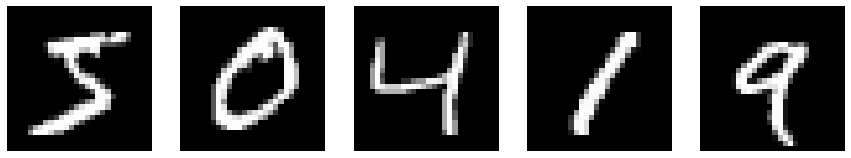

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = trainset_mnist_0.data[i]
    print(type(img))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')

Let's try a different data set

In [13]:
trainset_cifar10_0 = datasets.CIFAR10(root='./data', train=True, download=True)

Files already downloaded and verified


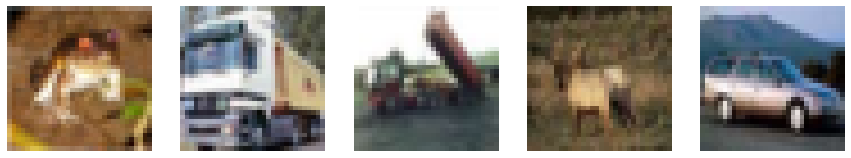

In [14]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = trainset_cifar10_0.data[i]
    axes[i].imshow(img)
    axes[i].axis('off')

## Transforms

Before we can pass the data to our Deep Learning model, we will often have to transform it to ensure that it has the correct format. Maybe, the images are too small or too large compared to the images that we have trained our model on. It is also common practice to normalise the images before passing them to the Deep Learning model, as this approach is beneficial for convergence, stability during training and the generalisation of the network. 

Let's define a transform for normalisation.

In [15]:
# MNIST is black and white. So, we only need one color channel. Other data sets have three 
means = np.array([0.5])
stds = np.array([0.5])

# Define the data transform including normalization
transform_mnist_0 = transforms.Compose([
    transforms.ToTensor(),  # convert to PyTorch tensor
    transforms.Normalize(mean=means, std=stds)  # normalize images
])

# In contrast, CIFAR10 provides pictures with three channels (RGB). 

means10 = np.array([0.5,0.5,0.5])
stds10 = np.array([0.5,0.5,0.5])

# Define the data transform including normalization
transform_cifar10_0 = transforms.Compose([
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize((means10), (stds10)),  # Normalize to a range of -1 to 1 for three channels
])

If we had defined the transform before we loaded the data, we could have applied the transform to the data right away. However, we can still do so retrospectively.

In [16]:
# Apply the transform to the dataset
trainset_cifar10_0.transform = transform_cifar10_0

We can divide the entire dataset into smaller batches, shuffle and provide an iterable interface for retrieving batches during the training process using the DataLoader class.

In [17]:
train_loader_cifar10 = DataLoader(trainset_cifar10_0, batch_size=32, shuffle=True)

If you plot the image, you can now see that the colours are a bit off because we normalised the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


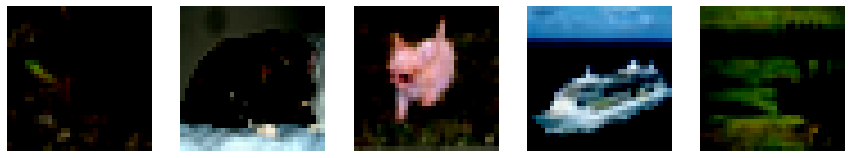

In [18]:
# Get the first batch from the data loader
dataiter = iter(train_loader_cifar10)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].permute(1, 2, 0)
    axes[i].imshow(img)
    axes[i].axis('off')

We can also use transforms for image augmentation, i.e., we scale, translate or rotate the images to create new images. By doing so, we reduce overfitting and introduce scale and orientation invariance.

In [19]:
transform_mnist_1 = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Randomflip
    transforms.RandomRotation(degrees=(-90, 90)),  # Random rotation between -30 and 30 degrees
    transforms.ToTensor(),  # convert to PyTorch tensor
    transforms.Normalize(mean=means, std=stds)  # normalize images
])

# Apply the transform to the dataset
trainset_mnist_0.transform = transform_mnist_1
train_loader_mnist = DataLoader(trainset_mnist_0, batch_size=32, shuffle=True)

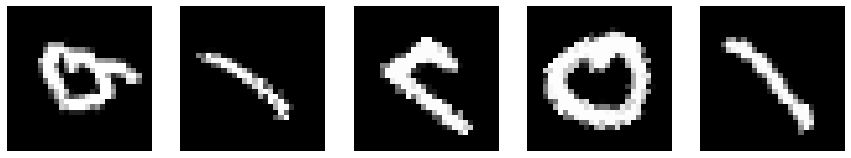

In [20]:
# Get the first batch from the data loader
dataiter = iter(train_loader_mnist)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].permute(1, 2, 0)
    axes[i].imshow(img, cmap="gray")
    axes[i].axis('off')

## Exercises

**Exercise 1**: Find out how to transpose, stack, reshape and permute tensors. 

**Exercise 2**: Construct a matrix as a PyTorch tensor. Perform matrix multiplication (cf. torch.matmul())

**Exercise 3**: Just like you can unsqueeze a tensor, you can squeeze it. Find out how and what it means.

**Exercise 4**: Load and plot examples from another data set from torchvision.

**Exercise 5**: In cell [18] above, where we plot the CIFAR10 images after normalisation, the colours are off. Correct for this by denormalising the picture before plotting.

**Exercise 6**: Above we discuss a few transforms for data augmentation. What other transforms are there for this purpose? Write the corresponding code below.